## Systematic Approach to Titanic Dataset 

In [2]:
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt

In [3]:
train_file_path = '~/Desktop/Practice/Titanic/data/train.csv'

In [4]:
train=pd.read_csv(train_file_path)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Survival Rate

In [7]:
total_passengers = train["PassengerId"].count()

In [8]:
total_passengers

891

In [9]:
total_survived = train[train.Survived == 1]["PassengerId"].count()

In [10]:
total_survived

342

In [11]:
import decimal
from decimal import Decimal

In [12]:
survival_rate_calculation = Decimal(total_survived/ total_passengers)

In [13]:
survival_rate = round(survival_rate_calculation,4)
survival_rate

0.0

## Survival Rate in each class

In [14]:
passenger_count_in_each_class = train.groupby("Pclass")["PassengerId"].count()
passenger_count_in_each_class

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [15]:
survival_in_each_class = train[train.Survived == 1].groupby("Pclass")["PassengerId"].count()
survival_in_each_class

Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64

In [16]:
survivor_percentage = (survival_in_each_class/ passenger_count_in_each_class)*100
survivor_percentage



Pclass
1    62.962963
2    47.282609
3    24.236253
Name: PassengerId, dtype: float64

## Survival Rate (Gender wise)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train["Sex"] = train["Sex"].map({'male':0,'female':1})    ## Assuming male:0 and female:1

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [40]:
women = train[train.Survived == 1][train.Sex == 1]["Sex"].sum()
print "Total women: %d" %women
men = total_passengers - women
print "Total men: %d" %men

Total women: 233
Total men: 658


/home/saura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [46]:
# women survival rate
import decimal
from decimal import Decimal

percent_women_survived = Decimal(women/ total_passengers)*100
print "Percent female survived: %f" %percent_women_survived

percent_men_survived = Decimal(men/ total_passengers)*100
print "Percent male survived: %f" %percent_men_survived

Percent female survived: 0.000000
Percent male survived: 0.000000


## Plots

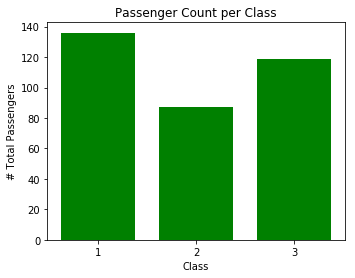

In [65]:
fig = plt.figure(figsize=plt.figaspect(0.75))
ax = fig.add_subplot(111)
bar_plot = ax.bar([1,2,3],survival_in_each_class,color = 'green',width=0.75)
ax.set_xlabel('Class')
ax.set_ylabel('# Total Passengers')
ax.set_title('Passenger Count per Class')
ax.set_xticks([1,2,3])

[[<matplotlib.axis.XTick at 0x7f08bf921b10>,
 [Text(0,0,'female'), Text(0,0,'male')]]

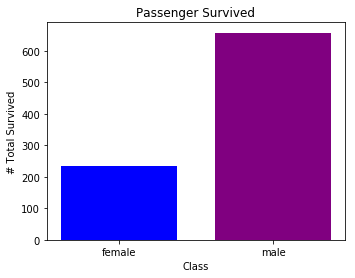

In [70]:
fig = plt.figure(figsize=plt.figaspect(0.75))
ax = fig.add_subplot(111)
bar_plot = ax.bar([1,2],[women,men], color= ['blue','purple'],width=0.75)
ax.set_xlabel('Class')
ax.set_ylabel('# Total Survived')
ax.set_title('Passenger Survived')
ax.xaxis.set(ticks=range(1,3),ticklabels=['female','male'])
